# Schizophrenia and Bipolar Disorder Classification

## Problem Statement:

Use ML tools to classify between Schizophrenia and Bipolar Disorder using the dataset in Dataset folder on your google drive.

The dataset is in the form of a pickle file (dictionary file). It has 6 feature keys - ALFF, fALFF, .... - and for each feature, 14 different atlas keys - AAL, Power, .....

For your task, you'll be using only the ReHo feature key, and its 14 corresponding atlas keys to classify between Schizophrenia and Bipolar Disorder with >70% accuracy.

ReHo is a term used in a functional MRI data. ReHo means Regional Homogenity. 
Different features of the dataset are the 14 atlas keys and their corresponding readings flattenend to 1 dimension. 

#### *Cannot upload the dataset

## Approach:
1. get required data in csv format
2. show counts of different classes 
3. dataset has 2390 features and 86 samples
4. perform ols on data
4. dimensionality reduction, and scaling data
5. perform ols on data, check if r-squared is reducing
6. show extracted feaures and interpretation
7. save model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

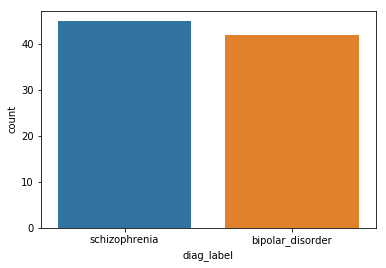

In [2]:
sns.countplot(x = 'diag_label', data=df)

#### diag_code is the output variable
diag_code = 0 => schizophrenia

diag_code = 1 => bipolar disorder

In [68]:
X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

In [69]:
dataset = X.join(y, how="inner")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


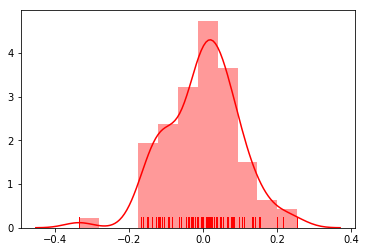

In [5]:
mean_readings = X.mean(axis=1)
sns.distplot(mean_readings, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


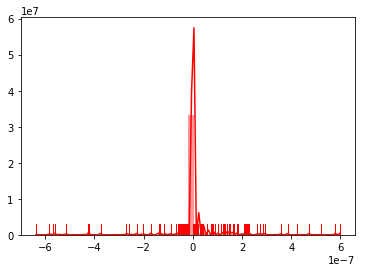

In [6]:
mean_feature = X.mean(axis=0)
sns.distplot(mean_feature, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


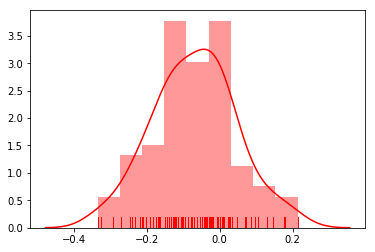

In [7]:
median_readings = X.median(axis=1)
sns.distplot(median_readings, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


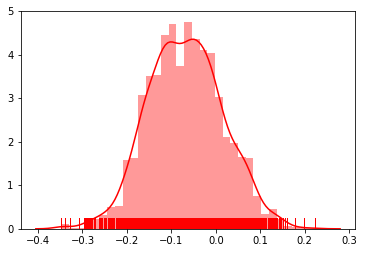

In [8]:
median_feature = X.median(axis=0)
sns.distplot(median_feature, rug=True, color= "red")

In [9]:
import statsmodels.api as sta

In [10]:
model = sta.OLS(y, X.iloc[:,0:50].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                 -0.657
Method:                 Least Squares   F-statistic:                    0.3103
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               1.00
Time:                        10:14:54   Log-Likelihood:                -76.536
No. Observations:                  87   AIC:                             253.1
Df Residuals:                      37   BIC:                             376.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0883      0.178      0.496      0.6

### Note:

The OLS results show that even 10 to 80 features from one dictionary 'aal' (1 type of features) are not enough to understand variability of the data.

#### observations:

r-squared= 22.2% but adjusted r-squared is negative. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that you can reject the null hypothesis.

Features with p-value < 0.15 should be included in the model. 

In [11]:
from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, DictionaryLearning

In [12]:
pca_SBD = PCA(n_components=4)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])


In [13]:
model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.543
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.197
Time:                        10:15:00   Log-Likelihood:                -88.649
No. Observations:                  87   AIC:                             185.3
Df Residuals:                      83   BIC:                             195.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.004      0.042      0.9

#### PCA gives us features that are a combination of other features

It can be seen that 4 features cannot explain more than 2% variability in data.

Now we load PCA to contain 90 percent of data information. 

In [14]:
pca_SBD = PCA(0.9)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)
print(pca_df.shape)

model = sta.OLS(y, pca_df.values[:,:10]) 

## using OLS on first 10 features Principal components only explain 10.2 % data variability

results = model.fit()

print(results.summary())

(87, 52)
                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8700
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.564
Time:                        10:15:02   Log-Likelihood:                -87.113
No. Observations:                  87   AIC:                             194.2
Df Residuals:                      77   BIC:                             218.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.004      0.041

<Figure size 432x288 with 0 Axes>

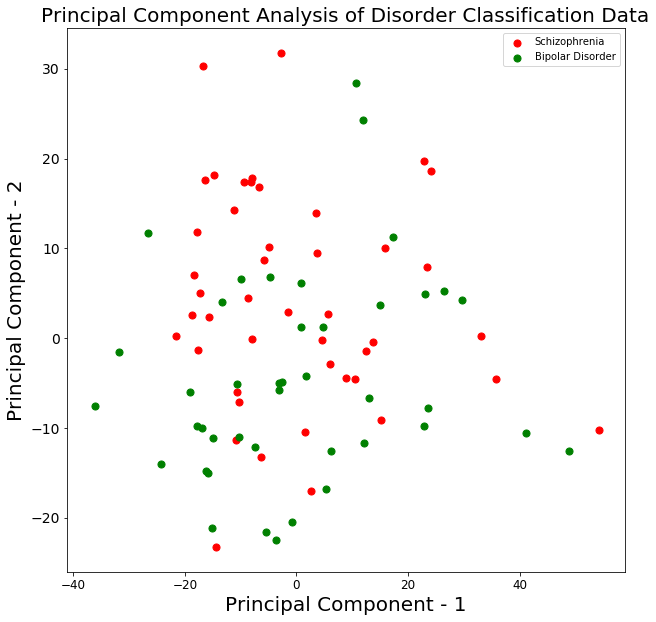

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()



### Note: 

This means that the 53 features also fail to explain the variability above 19% but adjusted r-square shows that the number of features are very high. 

In [16]:
pca_SBD = PCA(n_components=30)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)

model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.6465
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.902
Time:                        10:15:15   Log-Likelihood:                -79.030
No. Observations:                  87   AIC:                             218.1
Df Residuals:                      57   BIC:                             292.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.005      0.039      0.9

<Figure size 432x288 with 0 Axes>

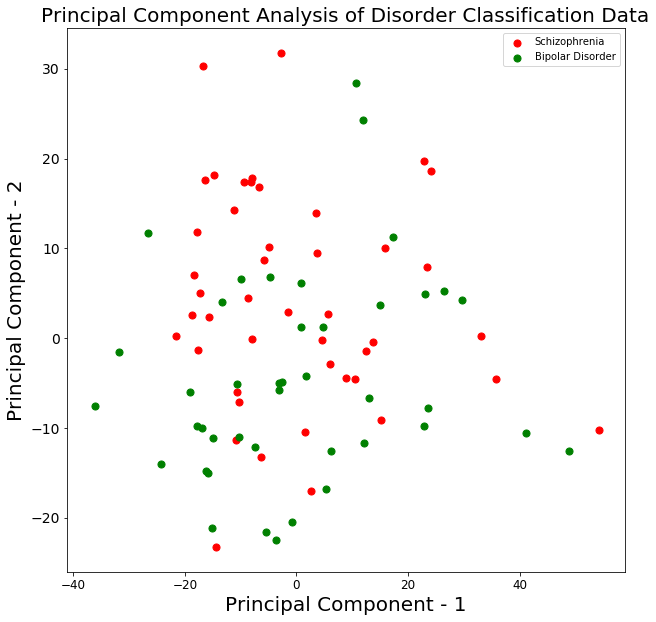

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()


# Auto-encoders for dimensionality reduction

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder.

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.



In [214]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy, MSE, kld
from keras import callbacks
from keras.initializers import RandomUniform, he_uniform

In [215]:
X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [217]:
X_train_scaled = minmax_scale(X_train, feature_range=(-1,1), axis = 1)
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60, 2390)
(27, 2390)


### Autoencoder model

Now we begin creating an Autoencoder Model with input shape same as number of features(=2390) and encoding dimension of our choice (=10). 

1. Create 'Input' layer with input shape 2390
2. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will decrease gradually (500, 100, 50, ...) and activation function 'relu'

3. create 'Dense' layer of the required encoding dimension. 

4. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will increase gradually (..., 50, 100, 500) and activation function 'relu'

5. Finally add output layer with sigmoid activation. 

6. when compiling model set the optimizer to adadelta as adagrad, adam, sgd yield bad results. This means either model doesn't get trained (takes a long time to train) or model doesn't generalize at all. 

In [174]:
### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]
drop_factor = 0.2
#init = RandomUniform(minval=-0.5, maxval=0.5)
init = he_uniform(seed = 42)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
first = Dense(2000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode1 = Dense(1500, activation = 'tanh', kernel_initializer=init)(first)
encode2 = Dense(1000, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(drop_factor)(encode2)
encode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(drop_factor)(encode3)
encode4 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout2)
encode5 = Dense(50, activation = 'tanh', kernel_initializer=init)(encode4)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh', kernel_initializer=init)(encode5)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(decode1)
dropout3 = Dropout(drop_factor)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(drop_factor)(decode3)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(dropout4)
decode5 = Dense(1500, activation = 'tanh', kernel_initializer=init)(decode4)
last = Dense(2000, activation = 'tanh', kernel_initializer=init)(decode5)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(last)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    #callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/baseline_model/'),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 2390)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 2000)              4782000   
_________________________________________________________________
dense_114 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dense_115 (Dense)            (None, 1000)              1501000   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 500)               500500    
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)               0         
__________

In [240]:
autoencoder.get_input_at(2)

ValueError: Asked to get input at node 2, but the layer has only 1 inbound nodes.

# Loss function Selection 

Performed training of this model using mean squared error and kullback Liebler divergence. 

We found that the model trained with 50 epochs: 

1. KLD and KNN algorithm for classification. Validation Accuracy was 77.777%
2. KLD and Random Forest algorithm for classification. Validation Accuracy was 70%
3. MSLE and KNN algorithm for classification. Validation Accuracy was 77.777%
4. MSLE and Random Forest algorithm for classification. Validation Accuracy was 70.307%
5. MSE and Logistic Regression algorithm for classification. Validation Accuracy was 66.666%
6. MSE and SVC algorithm for classification. Validation Accuracy was 70.307%

In [175]:
X_test.shape

(27, 2390)

In [176]:
d = autoencoder.fit(X_train_scaled, X_train_scaled, epochs = 20, batch_size = 32, shuffle = True, validation_split=0.4, callbacks=my_callbacks)

Train on 36 samples, validate on 24 samples
Epoch 1/20
36/36 [==============================] - 2s 56ms/step - loss: -1.0466 - acc: 1.6272e-04 - val_loss: -1.2826 - val_acc: 3.8354e-04
Epoch 2/20
36/36 [==============================] - 1s 30ms/step - loss: -1.3130 - acc: 1.9758e-04 - val_loss: -1.7899 - val_acc: 4.0098e-04
Epoch 3/20
36/36 [==============================] - 1s 25ms/step - loss: -1.8650 - acc: 2.5570e-04 - val_loss: -2.2421 - val_acc: 5.5788e-04
Epoch 4/20
36/36 [==============================] - 1s 26ms/step - loss: -2.3955 - acc: 4.1841e-04 - val_loss: -2.3871 - val_acc: 6.6248e-04
Epoch 5/20
36/36 [==============================] - 1s 29ms/step - loss: -2.5092 - acc: 5.1139e-04 - val_loss: -2.4171 - val_acc: 5.4045e-04
Epoch 6/20
36/36 [==============================] - 1s 27ms/step - loss: -2.5054 - acc: 4.7652e-04 - val_loss: -2.3643 - val_acc: 6.2762e-04
Epoch 7/20
36/36 [==============================] - 1s 27ms/step - loss: -2.5033 - acc: 4.1841e-04 - val_loss:

In [119]:
autoencoder.load_weights('./model.h5')

In [188]:
# serialize model to JSON
model_json = autoencoder.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_final.h5")
print("Saved model to disk")

Saved model to disk


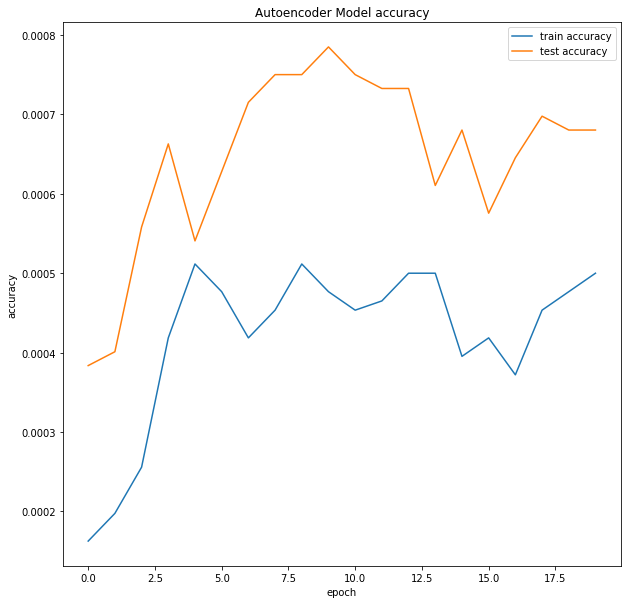

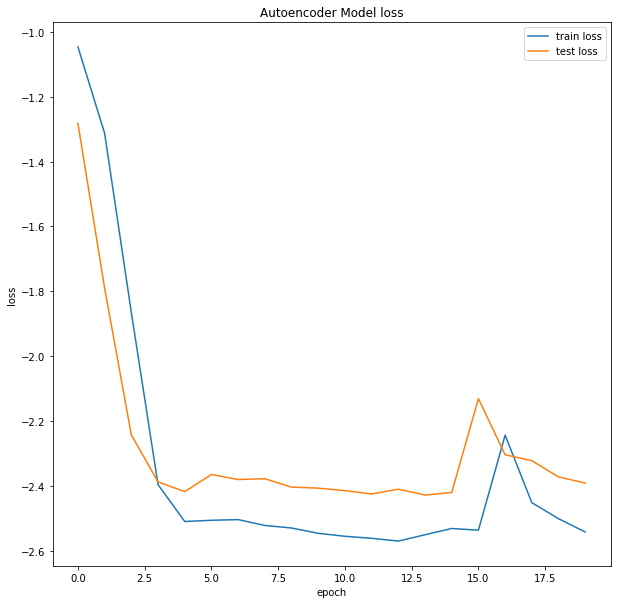

In [177]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
#plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

### Use Encoder to reduce dimension

In [178]:
encoder = Model(inputs = input_layer, outputs = mid)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(X_train_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.993258,-0.826741,-0.792124,0.835489,-0.997901,0.986415,-0.823255,0.970225,-0.538209,0.729914
1,-0.993116,-0.825079,-0.788042,0.834532,-0.997930,0.986379,-0.828106,0.970044,-0.525571,0.751943
2,-0.993473,-0.841596,-0.786810,0.823666,-0.997513,0.986560,-0.833230,0.968543,-0.470376,0.735539
3,-0.993584,-0.833996,-0.795268,0.834106,-0.997594,0.987045,-0.830497,0.969954,-0.515953,0.720032
4,-0.993086,-0.869872,-0.751084,0.700444,-0.997326,0.986268,-0.805754,0.966983,-0.375268,0.707574
5,-0.993647,-0.839465,-0.770364,0.818401,-0.997548,0.986221,-0.823788,0.968546,-0.451997,0.740561
6,-0.992756,-0.836685,-0.785072,0.820856,-0.997955,0.986538,-0.831745,0.967603,-0.541844,0.751174
7,-0.993312,-0.825456,-0.794688,0.839500,-0.997823,0.986676,-0.828665,0.970583,-0.532617,0.737645
8,-0.993239,-0.839124,-0.784380,0.830629,-0.997615,0.986820,-0.828595,0.968543,-0.526089,0.717912
9,0.993077,0.828106,0.794384,-0.830791,0.997755,-0.986358,0.825658,-0.969338,0.527624,-0.734750


In [236]:
# serialize model to JSON
model_json = encoder.to_json()
with open("encoder_model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("encoder_model_final.h5")
print("Saved Encoder model to disk")

Saved Encoder model to disk


In [179]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     3.684
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           0.000971
Time:                        10:58:07   Log-Likelihood:                -46.765
No. Observations:                  60   AIC:                             113.5
Df Residuals:                      50   BIC:                             134.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.1712    178.797      0.482      0.6

<Figure size 432x288 with 0 Axes>

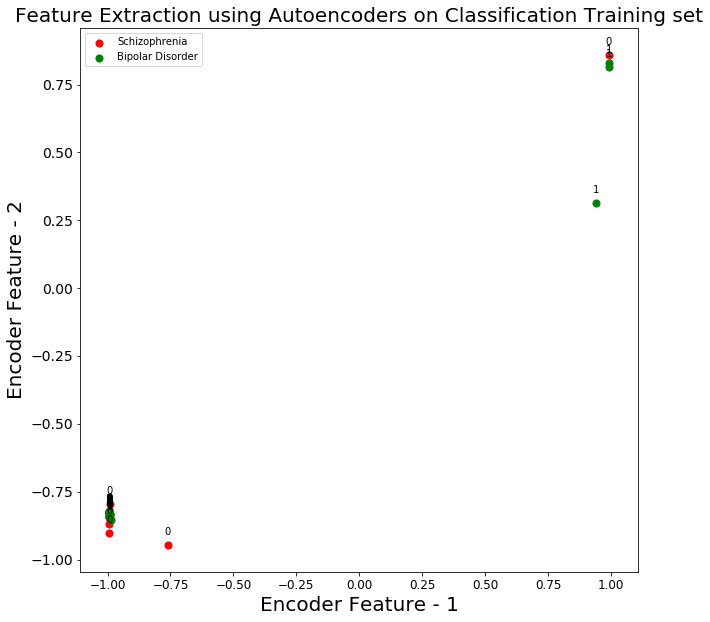

In [180]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,0:11]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

# Getting Test set

In [181]:
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
encoded_test = pd.DataFrame(encoder.predict(X_test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

In [182]:
X_train = encoded_train
X_test = encoded_test

## SVM Classifier gives the highest accuracy

In [183]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lda = LinearDiscriminantAnalysis()
clf = lda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

qda = QuadraticDiscriminantAnalysis()
clf = qda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(qda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[[11  3]
 [11  2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.50      0.79      0.61        14
Bipolar Disorder       0.40      0.15      0.22        13

       micro avg       0.48      0.48      0.48        27
       macro avg       0.45      0.47      0.42        27
    weighted avg       0.45      0.48      0.42        27

Accuracy Score:  0.48148148148148145


 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
[[ 4 10]
 [ 0 13]]
                  precision    recall  f1-score   support

   Schizophrenia       1.00      0.29      0.44        14
Bipolar Disorder       0.57      1.00      0.72        13

       micro avg       0.63      0.63      0.63        27
       macro avg       0.78      0.64      0.58        27
    

In [184]:

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegressionCV()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
#ac = AgglomerativeClustering()
sc = SpectralClustering()
from sklearn.svm import SVC
svc = SVC(probability=True)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

vc = VotingClassifier([('Random Forest',rf), ('Log_Reg', lr), ('Decision Tree',dt), 
                       #('Agglomerative Clustering',ac), ('Spectral Clustering',sc), 
                       ('Support vector classifier', svc), 
                       ('LDA', lda), ('QDA',qda) ],voting = 'hard', n_jobs= 20)

clf = vc.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(clf))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[10  4]
 [ 8  5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.56      0.71      0.63        14
Bipolar Disorder       0.56      0.38      0.45        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.56      0.55      0.54        27
    weighted avg       0.56      0.56      0.54        27

Accuracy Score:  0.5555555555555556


In [185]:
vc.score(X_test, y_test)

0.5555555555555556

In [186]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = SVC()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[[13  1]
 [11  2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.54      0.93      0.68        14
Bipolar Disorder       0.67      0.15      0.25        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.60      0.54      0.47        27
    weighted avg       0.60      0.56      0.48        27

Accuracy Score:  0.5555555555555556


/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Testing Other Classifiers

In [187]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))




 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[ 3 11]
 [ 1 12]]
                  precision    recall  f1-score   support

   Schizophrenia       0.75      0.21      0.33        14
Bipolar Disorder       0.52      0.92      0.67        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.64      0.57      0.50        27
    weighted avg       0.64      0.56      0.49        27

Accuracy Score:  0.5555555555555556


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[13  1]
 [10  3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.57      0.93      0.70        14
Bipolar Disorder       0.75      0.23      0.35        13

       micro avg       0.59      0.59   

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/himanshu.g



 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[10  4]
 [ 7  6]]
                  precision    recall  f1-score   support

   Schizophrenia       0.59      0.71      0.65        14
Bipolar Disorder       0.60      0.46      0.52        13

       micro avg       0.59      0.59      0.59        27
       macro avg       0.59      0.59      0.58        27
    weighted avg       0.59      0.59      0.59        27

Accuracy Score:  0.5925925925925926


 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,

# Cross Validation Score

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error, log_loss
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error)

n = encoded_train.shape[0]/3 #single class has at least 20 samples

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(10)

cv_results = cross_val_score(clf, encoded_train, y_train, scoring= mse, cv = int(n))
print(cv_results)

[0.75       0.25       0.5        0.25       0.75       0.
 0.5        0.         0.         0.33333333 0.66666667 0.
 1.         1.         0.5        0.         0.         0.5
 0.         0.        ]


In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

# Saving the model

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
clf = knn.fit(encoded_train, y_train)
y_hat = knn.predict(encoded_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[ 8  6]
 [ 1 12]]
                  precision    recall  f1-score   support

   Schizophrenia       0.89      0.57      0.70        14
Bipolar Disorder       0.67      0.92      0.77        13

       micro avg       0.74      0.74      0.74        27
       macro avg       0.78      0.75      0.73        27
    weighted avg       0.78      0.74      0.73        27

Accuracy Score:  0.7407407407407407


In [241]:
import pickle 

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)

In [156]:
# Performing OLS on training set
model = sta.OLS(y_test, encoded_test.iloc[:,:].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1.889
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.119
Time:                        10:55:27   Log-Likelihood:                -18.356
No. Observations:                  27   AIC:                             56.71
Df Residuals:                      17   BIC:                             69.67
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0359      0.424      0.085      0.9

# Full CNN

In [355]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, Conv1D
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy, MSE, kld
from keras import callbacks
from keras.initializers import RandomUniform, he_uniform

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 420)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [362]:
X_train_scaled = minmax_scale(X_train, feature_range=(-1,1), axis = 1)
X_train_scaled = np.reshape(X_train_scaled, (60, 2390, 1))
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
X_test_scaled = np.reshape(X_test_scaled, (27, 2390, 1))


print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60, 2390, 1)
(27, 2390, 1)


In [363]:
from keras.regularizers import l2
from keras.activations import tanh, relu
from keras.layers import MaxPooling1D, Flatten

In [364]:
# Model

maxlen = X_train.shape[1]
batch_size = 32
filters = 5
kernel_size = 50
stride = 19
epochs = 2
activation = tanh
reg = l2
drop_factor = 0.3


# define the number of features
ncol = X_train.shape[1]
drop_factor = 0.2
#init = RandomUniform(minval=-0.5, maxval=0.5)
init = he_uniform(seed = 42)

# Input Layer
input_layer = Input(shape = (ncol,1, ))
conv_1 = Conv1D(200, 200, strides=2, activation= activation)(input_layer)
conv_2 = Conv1D(200, 50, strides=2, activation= activation)(conv_1)
pool_1 = MaxPooling1D()(conv_2)
dropout_1 = Dropout(drop_factor)(pool_1)
conv_2 = Conv1D(200, 50, strides=2, activation= activation)(dropout_1)
conv_3 = Conv1D(200, 50, strides=2, activation= activation)(conv_2)
pool_2 = MaxPooling1D()(conv_3)
dropout_2 = Dropout(drop_factor)(pool_2)
flatten_1 = Flatten()(dropout_3)
dense_1 = Dense(100, activation=activation, kernel_initializer=init)(flatten_1)
output_layer = Dense(1, activation = 'sigmoid', kernel_initializer=init)(dense_1)


cnn_model = Model(inputs = input_layer, outputs = output_layer)


cnn_model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])



In [365]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        (None, 2390, 1)           0         
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 1096, 200)         40200     
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 548, 200)          0         
_________________________________________________________________
dropout_123 (Dropout)        (None, 548, 200)          0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 250, 200)          2000200   
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 125, 200)          0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 125, 200)          0         
__________

In [366]:
d = cnn_model.fit(X_train_scaled, y_train, batch_size=30, epochs= 100, validation_split=0.3, shuffle= True)

Train on 42 samples, validate on 18 samples
Epoch 1/100
42/42 [==============================] - 10s 228ms/step - loss: 0.7153 - acc: 0.4524 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 2/100
42/42 [==============================] - 7s 166ms/step - loss: 0.7381 - acc: 0.5476 - val_loss: 1.3567 - val_acc: 0.5556
Epoch 3/100
42/42 [==============================] - 7s 177ms/step - loss: 1.8727 - acc: 0.3810 - val_loss: 1.3992 - val_acc: 0.5556
Epoch 4/100
42/42 [==============================] - 7s 160ms/step - loss: 1.7244 - acc: 0.3333 - val_loss: 0.9571 - val_acc: 0.5556
Epoch 5/100
42/42 [==============================] - 6s 134ms/step - loss: 0.8646 - acc: 0.4762 - val_loss: 0.9109 - val_acc: 0.4444
Epoch 6/100
42/42 [==============================] - 6s 133ms/step - loss: 0.7831 - acc: 0.5476 - val_loss: 0.6922 - val_acc: 0.5556
Epoch 7/100
42/42 [==============================] - 5s 126ms/step - loss: 0.6982 - acc: 0.5000 - val_loss: 0.6871 - val_acc: 0.5556
Epoch 8/100
42/42 [=====

Epoch 62/100
42/42 [==============================] - 6s 150ms/step - loss: 0.7198 - acc: 0.4286 - val_loss: 0.6873 - val_acc: 0.5556
Epoch 63/100
42/42 [==============================] - 5s 130ms/step - loss: 0.6951 - acc: 0.5476 - val_loss: 0.7037 - val_acc: 0.4444
Epoch 64/100
42/42 [==============================] - 5s 128ms/step - loss: 0.7032 - acc: 0.5476 - val_loss: 0.7072 - val_acc: 0.4444
Epoch 65/100
42/42 [==============================] - 6s 132ms/step - loss: 0.7058 - acc: 0.5238 - val_loss: 0.6874 - val_acc: 0.5556
Epoch 66/100
42/42 [==============================] - 5s 127ms/step - loss: 0.6964 - acc: 0.5000 - val_loss: 0.6906 - val_acc: 0.5556
Epoch 67/100
42/42 [==============================] - 6s 146ms/step - loss: 0.6897 - acc: 0.4762 - val_loss: 0.6957 - val_acc: 0.4444
Epoch 68/100
42/42 [==============================] - 6s 141ms/step - loss: 0.6963 - acc: 0.5476 - val_loss: 0.7055 - val_acc: 0.4444
Epoch 69/100
42/42 [==============================] - 6s 152ms

In [354]:
y_hat = cnn_model.predict(X_test_scaled)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[ 0 14]
 [ 0 13]]
                  precision    recall  f1-score   support

   Schizophrenia       0.00      0.00      0.00        14
Bipolar Disorder       0.48      1.00      0.65        13

       micro avg       0.48      0.48      0.48        27
       macro avg       0.24      0.50      0.33        27
    weighted avg       0.23      0.48      0.31        27

Accuracy Score:  0.48148148148148145


/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [257]:
### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]
drop_factor = 0.2
#init = RandomUniform(minval=-0.5, maxval=0.5)
init = he_uniform(seed = 42)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
first = Dense(2000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode1 = Dense(1500, activation = 'tanh', kernel_initializer=init)(first)
encode2 = Dense(1000, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(drop_factor)(encode2)
encode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(drop_factor)(encode3)
encode4 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout2)
encode5 = Dense(50, activation = 'tanh', kernel_initializer=init)(encode4)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh', kernel_initializer=init)(encode5)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(decode1)
dropout3 = Dropout(drop_factor)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(drop_factor)(decode3)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(dropout4)
decode5 = Dense(1500, activation = 'tanh', kernel_initializer=init)(decode4)
last = Dense(2000, activation = 'tanh', kernel_initializer=init)(decode5)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(last)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    #callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/baseline_model/'),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'msle', metrics=['accuracy'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 2390)              0         
_________________________________________________________________
dense_346 (Dense)            (None, 2000)              4782000   
_________________________________________________________________
dense_347 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dense_348 (Dense)            (None, 1000)              1501000   
_________________________________________________________________
dropout_65 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_349 (Dense)            (None, 500)               500500    
_________________________________________________________________
dropout_66 (Dropout)         (None, 500)               0         
__________

In [ ]:
X_test_scaled

<Figure size 432x288 with 0 Axes>

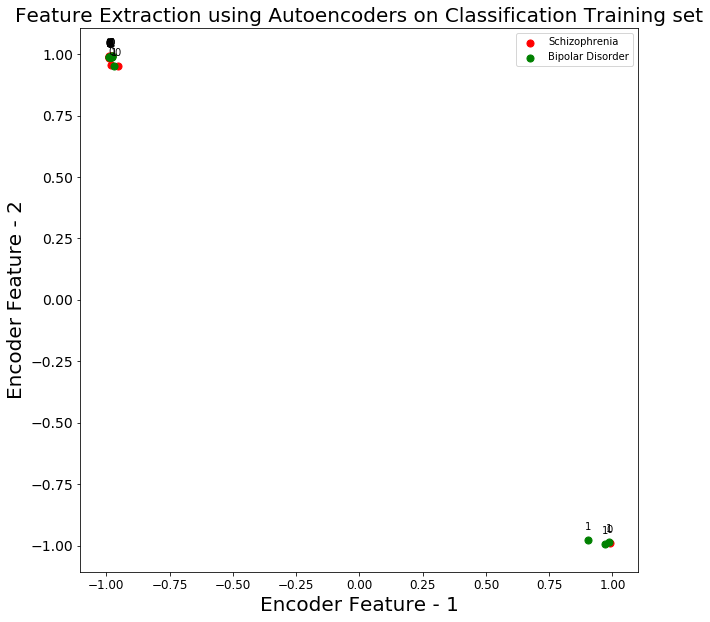

In [136]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_test.iloc[:,3:10]
cols = df_graph.columns
y_graph = y_test.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

## Using CNN layers



# Observation and Aproach change

When looking at encoded_train variable, it is noticed that some features(feature_0, feature_1,feature_3 and feature_8) are showing 0 as encoded values.

This is due to the problem of *Vanishing Gradients*.

New Problem observed : Vanishing Gradients

visualization of the problem usning tensorflow

Problem Solution : add dropout layers and change activation function

In [189]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy
from keras import callbacks
from keras.initializers import RandomUniform


In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# note: 
X(input features) need to be scaled between 0 to 1 or -1 to 1.

Neural Networks yield quick results after feature scaling.


In [305]:
X_scaled = minmax_scale(X_train, axis = 0, feature_range=(0, 1))
X_train = X_scaled # doing this because the rest of the code is based on X_train

When using the rectified linear activation function (or ReLU for short), 
it is good practice to use the He weight initialization scheme. 

Also when using ReLU the features need to be scaled between 0 and 1.

We can define the MLP with five hidden layers using ReLU and He initialization

In [316]:
from keras.backend import clear_session
clear_session()

In [317]:
from keras.layers import Dropout
from keras.initializers import RandomUniform, he_uniform

### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]

init = RandomUniform(minval=-0.5, maxval=0.5)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
encode1 = Dense(1000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode2 = Dense(500, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(0.01)(encode2)
encode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(0.01)(encode2)
encode3 = Dense(50, activation = 'tanh', kernel_initializer=init)(dropout2)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh')(encode3)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
dropout3 = Dropout(0.01)(decode1)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(0.01)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout4)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(decode3)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(decode4)

# Combine Encoder and Deocder layers and define model
#autoencoder = Sequential()
#initializer = tf.keras.initializers.RandomUniform(minval=0.3, maxval=0.7)

autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    callbacks.ModelCheckpoint(filepath='deep model-{epoch:02d}-{val_loss:.2f}.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/deep_100_epoch/', histogram_freq=1, write_grads=True),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

print("Model Compiled!!!")

d = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 32, shuffle = True, validation_split=0.3, callbacks=my_callbacks)

Model Compiled!!!
Train on 48 samples, validate on 21 samples
Epoch 1/100
48/48 [==============================] - 2s 33ms/step - loss: 4.0121 - acc: 0.0114 - val_loss: 3.5876 - val_acc: 0.0124
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 3.5262 - acc: 0.0117 - val_loss: 3.1957 - val_acc: 0.0129
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 3.1004 - acc: 0.0122 - val_loss: 2.8901 - val_acc: 0.0131
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 2.8311 - acc: 0.0124 - val_loss: 2.0003 - val_acc: 0.0134
Epoch 5/100
48/48 [==============================] - 0s 10ms/step - loss: 1.9523 - acc: 0.0134 - val_loss: 1.6477 - val_acc: 0.0135
Epoch 6/100
48/48 [==============================] - 0s 8ms/step - loss: 1.6254 - acc: 0.0136 - val_loss: 1.3525 - val_acc: 0.0137
Epoch 7/100
48/48 [==============================] - 0s 8ms/step - loss: 1.3787 - acc: 0.0138 - val_loss: 1.2207 - val_acc: 0.0136
Epoch 8/100
48/48 [

In [318]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2390)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2391000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
__________

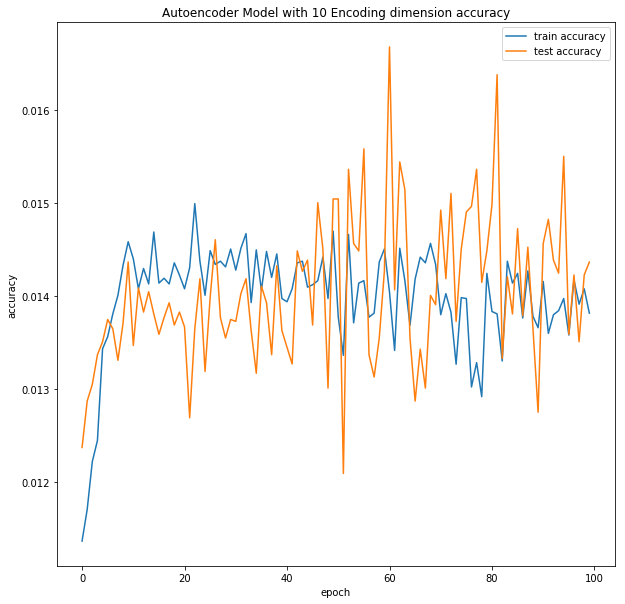

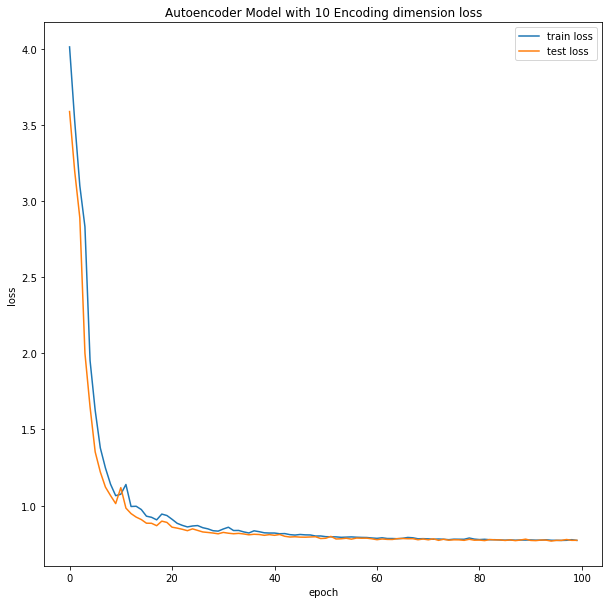

In [319]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model with 10 Encoding dimension accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model with 10 Encoding dimension loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [320]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)

encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.898566,-0.616781,0.192092,-0.978011,0.944101,-0.879987,-0.979606,-0.996983,0.69558,-0.860505


#### Perform OLS

In [321]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.iloc[:].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     6.442
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.28e-06
Time:                        02:35:05   Log-Likelihood:                -45.934
No. Observations:                  69   AIC:                             111.9
Df Residuals:                      59   BIC:                             134.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5491      1.212      0.453      0.6

<Figure size 432x288 with 0 Axes>

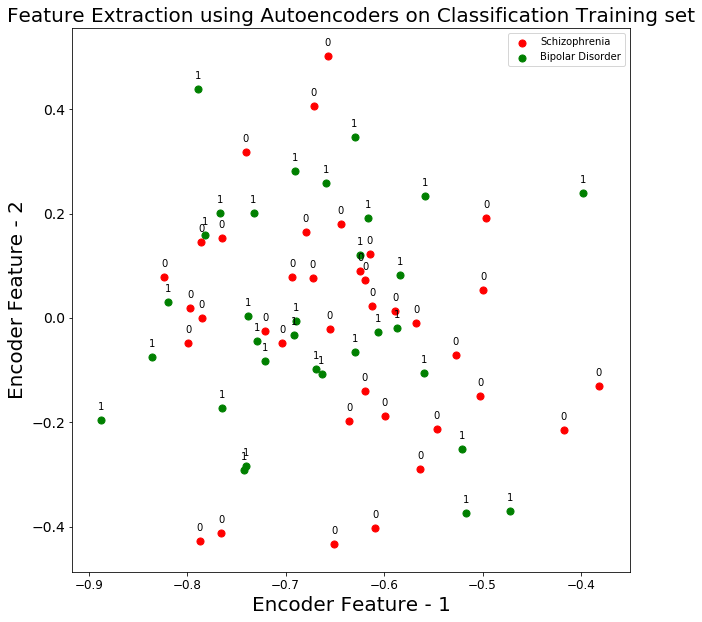

In [322]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,1:10]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

In [323]:
# preprocessing the X_test
X_scaled = minmax_scale(X_test, axis = 0, feature_range=(0, 1))
X_test = X_scaled
encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')

## Create Classifier

using a Logistic Classifier


In [324]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[1 7]
 [2 8]]
                  precision    recall  f1-score   support

   Schizophrenia       0.33      0.12      0.18         8
Bipolar Disorder       0.53      0.80      0.64        10

       micro avg       0.50      0.50      0.50        18
       macro avg       0.43      0.46      0.41        18
    weighted avg       0.44      0.50      0.44        18

Accuracy Score:  0.5


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[6 2]
 [8 2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.43      0.75      0.55         8
Bipolar Disorder       0.50      0.20      0.29        10

       micro avg       0.44      0.44      0.44        18
     

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)




 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[6 2]
 [8 2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.43      0.75      0.55         8
Bipolar Disorder       0.50      0.20      0.29        10

       micro avg       0.44      0.44      0.44        18
       macro avg       0.46      0.47      0.42        18
    weighted avg       0.47      0.44      0.40        18

Accuracy Score:  0.4444444444444444


In [329]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf = dt.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
clf = rf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[4 4]
 [7 3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.36      0.50      0.42         8
Bipolar Disorder       0.43      0.30      0.35        10

       micro avg       0.39      0.39      0.39        18
       macro avg       0.40      0.40      0.39        18
    weighted avg       0.40      0.39      0.38        18

Accuracy Score:  0.3888888888888889


 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[8 0]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.62      1.00      0.76         8
Bipolar Disorder       1.00      0.50      0.67        10

       micro avg       0.72

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
[[4 4]
 [7 3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.36      0.50      0.42         8
Bipolar Disorder       0.43      0.30      0.35        10

       micro avg       0.39      0.39      0.39        18
       macro avg       0.40      0.40      0.39        18
    weighted avg       0.40      0.39      0.38        18

Accuracy Score:  0.3888888888888889


In [331]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[1 7]
 [3 7]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.12      0.17         8
Bipolar Disorder       0.50      0.70      0.58        10

       micro avg       0.44      0.44      0.44        18
       macro avg       0.38      0.41      0.38        18
    weighted avg       0.39      0.44      0.40        18

Accuracy Score:  0.4444444444444444


 AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')
[[2 6]
 [6 4]]
                  precision    recall  f1-score   support

   Schizophrenia       0.25      0.25      0.25         8
Bipolar Disorder       0.40      0.40      0.40        10

       micro avg       0.33  

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  n_init=n_init)


In [333]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))




 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[6 2]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.55      0.75      0.63         8
Bipolar Disorder       0.71      0.50      0.59        10

       micro avg       0.61      0.61      0.61        18
       macro avg       0.63      0.62      0.61        18
    weighted avg       0.64      0.61      0.61        18

Accuracy Score:  0.6111111111111112


In [335]:
# looking at model output
encoder = Model(inputs = input_layer, outputs = mid)

encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.898566,-0.616781,0.192092,-0.978011,0.944101,-0.879987,-0.979606,-0.996983,0.69558,-0.860505


In [336]:
output_layer = Dense(1, activation='sigmoid')(mid)
clf = Model(inputs = input_layer, outputs = output_layer)
clf.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [337]:
d = clf.fit(X_train, y_train, epochs=100, batch_size= 32, validation_split=0.4)

Train on 41 samples, validate on 28 samples
Epoch 1/100
41/41 [==============================] - 1s 23ms/step - loss: 0.7823 - acc: 0.3902 - val_loss: 0.6688 - val_acc: 0.6071
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6986 - acc: 0.5366 - val_loss: 0.6723 - val_acc: 0.6071
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6530 - acc: 0.6585 - val_loss: 0.7327 - val_acc: 0.4286
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5963 - acc: 0.7073 - val_loss: 0.7502 - val_acc: 0.4643
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5897 - acc: 0.7073 - val_loss: 0.7584 - val_acc: 0.3929
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5476 - acc: 0.6585 - val_loss: 0.7549 - val_acc: 0.4286
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5367 - acc: 0.7073 - val_loss: 0.7499 - val_acc: 0.3929
Epoch 8/100
41/41 [===================

Epoch 63/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0686 - acc: 1.0000 - val_loss: 1.0143 - val_acc: 0.5000
Epoch 64/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0679 - acc: 1.0000 - val_loss: 1.0106 - val_acc: 0.5000
Epoch 65/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0670 - acc: 1.0000 - val_loss: 1.0060 - val_acc: 0.5000
Epoch 66/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0660 - acc: 1.0000 - val_loss: 1.0038 - val_acc: 0.5357
Epoch 67/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0653 - acc: 1.0000 - val_loss: 1.0039 - val_acc: 0.5357
Epoch 68/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0642 - acc: 1.0000 - val_loss: 1.0068 - val_acc: 0.5357
Epoch 69/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0637 - acc: 1.0000 - val_loss: 1.0105 - val_acc: 0.5357
Epoch 70/100
41/41 [==============================] - 0s 3ms/step - loss: 0.

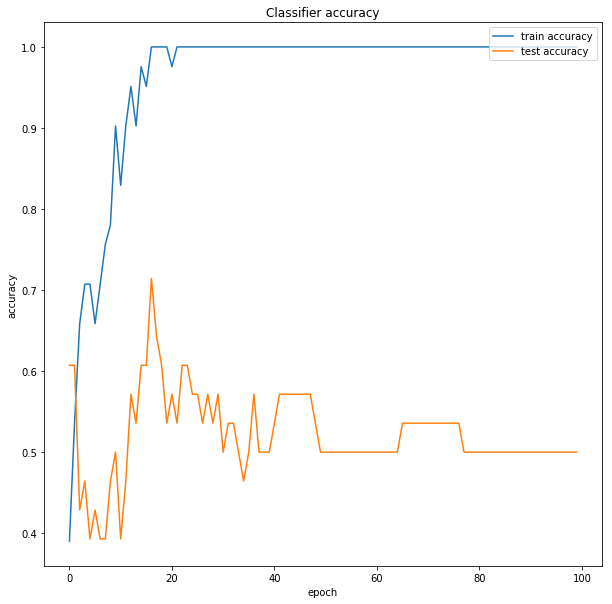

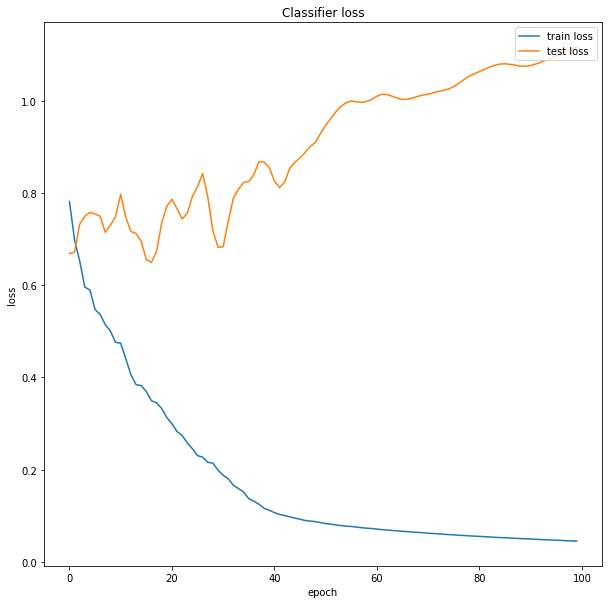

In [338]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Classifier accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Classifier loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [339]:
y_pred = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('Dense Layer Classification\n\n',)
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[6 2]
 [5 5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.55      0.75      0.63         8
Bipolar Disorder       0.71      0.50      0.59        10

       micro avg       0.61      0.61      0.61        18
       macro avg       0.63      0.62      0.61        18
    weighted avg       0.64      0.61      0.61        18

Accuracy Score:  0.6111111111111112


In [221]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_hat)
names = ['Schizophrenia','Bipolar Disorder']
print_confusion_matrix(c,names

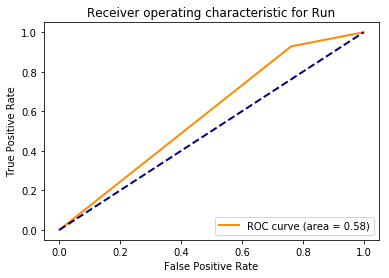

In [227]:
#plt.figure(figsize=(10,10))

fpr, tpr, _ = roc_curve(y_test, y_hat, pos_label=1)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Run')
plt.legend(loc="lower right")


plt.show()


In [87]:
# serialize model to JSON
model_json = autoencoder.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_final.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
from keras.backend import clear_session
clear_session()

In [189]:
# load json and create model
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")
print("Loaded model from disk")

NameError: name 'model_from_json' is not defined

In [89]:
from ann_visualizer.visualize import ann_viz 

ann_viz(model, view=True, filename= 'Autoencoder Network.gv')

ModuleNotFoundError: No module named 'ann_visualizer'